# 1. What is KNN?
KNN (K-Nearest Neighbors) is a supervised learning algorithm used for both classification and regression.  
It is a lazy learning algorithm — it does not learn a model during training. Instead, it memorizes the training data and makes predictions at runtime based on the closest data points.

---

# 2. How Does KNN Work?
1. Choose the number of neighbors (K).  
2. Calculate the distance (usually Euclidean) between the query point and all training points.  
3. Select the K nearest neighbors.  
4. For classification: take the majority vote among neighbors.  
   For regression: take the average of neighbor values.

---

# 3. Key Concepts
**Distance Metrics:**  
- Euclidean  
- Manhattan  
- Minkowski  
- Cosine  

**Choosing K:**  
- Small K → sensitive to noise.  
- Large K → smoother predictions but may include irrelevant neighbors.

---

# 4. Pros and Cons of KNN

**Pros:**  
- Simple to implement  
- No training phase  
- Works for classification & regression  
- Adaptable to non-linear data  

**Cons:**  
- Slow at prediction time  
- Sensitive to outliers  
- Affected by scale  
- High memory usage  
- Poor with high-dimensional data

---

# 5. Limitations
1. **Large Datasets:**  
   - Problem: Slow predictions.  
   - Solution: Use KD-Trees, Ball Trees, or approximate nearest neighbors.

2. **High Dimensional Data:**  
   - Problem: Curse of dimensionality.  
   - Solution: Use dimensionality reduction (PCA, t-SNE).

3. **Outliers:**  
   - Problem: Outliers mislead predictions.  
   - Solution: Remove outliers or increase K.

4. **Non-Homogeneous Scale:**  
   - Problem: Features with large values dominate.  
   - Solution: Standardize or normalize features.

5. **Imbalanced Datasets:**  
   - Problem: Majority class dominates.  
   - Solution: Use weighted KNN or resampling methods.

6. **Prediction, Not Inference:**  
   - Problem: No feature importance or interpretability.  
   - Solution: Use only when prediction is the goal.

---

# 6. Real-World Use Cases
- Recommender Systems  
- Image Recognition  
- Document Classification  
- Anomaly Detection

---

# 7. Best Practices
- Always scale features  
- Tune K using cross-validation  
- Try weighted KNN  
- Remove outliers  
- Use PCA for high dimensions  
- Avoid for very large datasets

---

# 8. Summary Table

| Aspect                  | KNN Behavior                |
|-------------------------|-----------------------------|
| Learning Type           | Lazy (instance-based)       |
| Training Time           | Fast                        |
| Prediction Time         | Slow                        |
| Interpretability        | Low                         |
| Feature Scaling Needed  | Yes                         |
| Sensitivity to Outliers | High                        |
| Works with Large Data   | Poor unless optimized       |
| Handles Multiclass?     | Yes                         |
| Dimensionality Tolerant | No – needs reduction        |


# 🧠 K-Nearest Neighbors (KNN) from Scratch in Pure Python

This is a basic implementation of the **KNN algorithm** for classification, created using only built-in Python features (no external libraries). This will help you understand how KNN actually works behind the scenes.

---



## 📦 **Step 1: Create a Small Dataset**

In [85]:
# Sample training dataset with features and class labels
dataset = [
    [2, 4, 'A'],   # Point 1 belongs to class A
    [4, 6, 'A'],   # Point 2 belongs to class A
    [6, 8, 'B'],   # Point 3 belongs to class B
    [8, 10, 'B'],  # Point 4 belongs to class B
    [1, 1, 'A']    # Point 5 belongs to class A
]

📝 **Explanation**:  
Each data point has two features (like *x* and *y*) and a label ('A' or 'B'). This dataset will be used to compare against a new point we want to classify.


### 📏 **Step 2: Calculate Euclidean Distance**


In [86]:
import math

def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.
    Each point is a list of features.
    """
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2  # sum of squared differences
    return math.sqrt(distance)  # take square root to complete distance formula


📝 **Explanation**:  
This function calculates how "far apart" two points are using the Euclidean distance formula:

$$
\text{Distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$


### 🔍 **Step 3: Find K Nearest Neighbors**


In [87]:
def get_neighbors(training_data, test_point, k):
    """
    Find the k closest data points (neighbors) to the test_point.
    """
    distances = []
    for row in training_data:
        features = row[:-1]  # All values except label
        label = row[-1]      # Last value is the label
        dist = euclidean_distance(features, test_point)  # Calculate distance
        distances.append((dist, label))  # Save (distance, label)

    distances.sort()  # Sort by smallest distance
    neighbors = distances[:k]  # Take first k points
    return neighbors


📝 **Explanation:**  
This function goes through each training point, calculates its distance to the test point, and keeps track of the closest *k* neighbors.


In [88]:

# Define a new data point we want to classify (features only, no label)
test_point = [5, 7]

# Set the number of neighbors to consider
k = 3

# Find the k nearest neighbors from the dataset to the test point
get_neighbors(dataset , test_point, k)


[(1.4142135623730951, 'A'),
 (1.4142135623730951, 'B'),
 (4.242640687119285, 'A')]


📝 **Explanation:**
- `test_point`: The input for which we want to predict the class.
- `k`: The number of nearest neighbors to use for classification.
- `get_neighbors(...)`: This function returns the top `k` closest training points (based on Euclidean distance) to the `test_point`.




### ✅ **Step 4: Make a Prediction Using Voting**


In [89]:
def predict_classification(training_data, test_point, k):
    """
    Predict the class label by majority vote among the k nearest neighbors.
    """
    neighbors = get_neighbors(training_data, test_point, k)
    class_votes = {}

    for dist, label in neighbors:
        if label not in class_votes:
            class_votes[label] = 1
        else:
            class_votes[label] += 1

    # Find the class with the most votes
    return max(class_votes, key=class_votes.get)


📝 **Explanation**:  
This function collects the *k* nearest labels and then finds the one with the highest frequency. That’s the predicted class. This is how majority voting works in KNN classification.


### 🧪 **Step 5: Test the KNN Algorithm**


In [90]:
# Define the point to classify (only features, no label)
test_point = [5, 7]

# Number of neighbors to consider
k = 3

# Make the prediction
prediction = predict_classification(dataset, test_point, k)

# Show the result
print("Predicted class:", prediction)


Predicted class: A


📝 **Explanation:**  
We are predicting the label for the point `[5, 7]`. The function will look at the 3 nearest points from the training set and choose the most common label among them.


✅ **Summary of How This Works**

| Step    | Description                                 |
|---------|---------------------------------------------|
| Step 1  | Define training data with labels            |
| Step 2  | Use Euclidean formula to measure similarity |
| Step 3  | Find K closest points (neighbors)           |
| Step 4  | Use voting to decide most common class      |
| Step 5  | Predict label and print result              |


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 🧠 Support Vector Machine (SVM) — Complete Notes

---

## 📌 What is SVM?

**Support Vector Machine (SVM)** is a powerful **supervised machine learning algorithm** used for both classification and regression tasks.  
Its goal is to find a **decision boundary (hyperplane)** that best separates data into classes with the **maximum margin**.

---

## 🧩 How SVM Works

- SVM finds the **best line or hyperplane** that divides the data into two classes.
- It chooses the one with the **maximum margin**, i.e., the farthest from the nearest data points of each class.
- These closest points are called **support vectors**.

### 🧮 Decision Function

For 2D:

$$
f(x) = w \cdot x + b
$$

- \( w \): weights  
- \( b \): bias (intercept)

Classification:

- If \( f(x) \>= 0 \) → class `+1`
- If \( f(x) < 0 \) → class `-1

---

## 📐 Hyperplane, Margin, and Support Vectors

- **Hyperplane**: A boundary that separates data into classes.
- **Margin**: Distance from the hyperplane to the nearest data points.
- **Support Vectors**: Points closest to the hyperplane; they define the margin.

---

## 🔄 Hard Margin vs. Soft Margin

### Hard Margin SVM

- Assumes data is **perfectly separable**
- No misclassifications allowed
- Sensitive to noise

### Soft Margin SVM

- Allows some misclassification
- Uses **regularization parameter (C)** to control the trade-off between margin size and classification errors

---

## 🧠 Hinge Loss (Used in SVM)

$$
\text{Loss} = \max(0, 1 - y(w \cdot x + b))
$$

- Penalizes only when the point is inside the margin or misclassified

---

## 🧮 Optimization Objective

Minimize:

$$
\frac{1}{2} \|w\|^2 + C \sum \xi_i
$$

Subject to:

$$
y_i(w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

- \( C \): regularization parameter controlling margin vs error

---

## 🌀 Kernel Trick

SVM can also handle **non-linearly separable** data using **kernel functions**.

### Common Kernels

| Kernel         | Description                          |
| -------------- | ------------------------------------ |
| Linear         | For linearly separable data          |
| Polynomial     | Adds power terms (x², x³, ...)       |
| RBF / Gaussian | Good for complex, curved boundaries  |
| Sigmoid        | Similar to neural network activation |

---

## ✅ Advantages of SVM

- Effective in **high-dimensional** spaces
- Works well with **clear margin of separation**
- Memory efficient (uses only support vectors)
- Can be extended with kernels for non-linear problems

---

## ❌ Disadvantages of SVM

- Slow training on **large datasets**
- Needs careful **parameter tuning** (C, kernel)
- Doesn't perform well when classes **overlap heavily**
- No direct **probability output** (like logistic regression)

---

## 📂 Use Cases of SVM

- Image classification
- Text categorization (spam detection)
- Bioinformatics (gene classification)
- Face detection
- Handwriting recognition

---

## 📊 Summary Table

| Feature               | Description                              |
| --------------------- | ---------------------------------------- |
| Type                  | Supervised Learning                      |
| Task                  | Classification & Regression              |
| Margin-based?         | ✅ Yes (Maximize margin)                  |
| Handles Non-linearity | ✅ Yes (with kernel trick)                |
| Sensitive to Outliers | ✅ Yes (soft margin helps reduce this)    |
| Probabilistic Output  | ❌ No (can be approximated with methods)  |
| Training Speed        | 🐢 Slower on large datasets              |
| Prediction Speed      | 🚀 Fast (relies on support vectors only) |

---

## 🔁 SVM vs KNN

| Feature                   | SVM                                        | KNN                                          |
| ------------------------- | ------------------------------------------ | -------------------------------------------- |
| **Type**                  | Model-based (learns decision boundary)     | Instance-based (no training, just memory)    |
| **Training Time**         | High (optimization required)               | None (just store data)                       |
| **Prediction Time**       | Fast (depends on #support vectors)         | Slow (needs distance to all training points) |
| **Handles Non-linearity** | Yes (with kernel)                          | Partially (can work with non-linear shapes)  |
| **Outlier Sensitivity**   | High (can be handled with soft margin)     | High (affected by local noise)               |
| **Memory Usage**          | Low (uses only support vectors)            | High (stores entire dataset)                 |
| **Intuition**             | Finds boundary with max margin             | "Looks at k nearest neighbors"               |
| **Use Case**              | Text/image classification, structured data | Small/clean datasets, pattern recognition    |




### Import matplotlib for plotting

In [92]:
import matplotlib.pyplot as plt


- Imports the plotting library to visualize data points, decision boundary, margins, and support vectors.



### 🔢 DATA SETUP

In [93]:
# Sample linearly separable data
data = [
    ([2, 4], 1),
    ([4, 4], 1),
    ([4, 2], 1),
    ([6, 2], -1),
    ([4, 0], -1),
    ([6, 0], -1)
]


- This is your training dataset.

- Each item is a tuple: (`[x1, x2]`, label)

- The label is either `1` or `-1` (binary classification).

- The data is **linearly separable**, meaning you can draw a straight line to separate classes.


### ⚙️ INITIALIZATION

In [94]:
w = [0.0, 0.0]  # weights for each feature (x1, x2)
b = 0.0         # bias term
learning_rate = 0.01
epochs = 1000   # number of training iterations


- `w` is a list of weights `[w1, w2]` — initially zero.

- `b` is the bias — the intercept in the decision boundary equation.

- `learning_rate` controls the step size of updates.

- `epochs` defines how many times to loop through the dataset.


### 🔁 TRAINING LOOP

In [95]:
for epoch in range(epochs):
    for x, y in data:
        output = y * (w[0]*x[0] + w[1]*x[1] + b)  # Calculate margin
        if output < 1:
            # Point is inside margin or misclassified
            w[0] += learning_rate * (y * x[0])  # Update weight for x1
            w[1] += learning_rate * (y * x[1])  # Update weight for x2
            b += learning_rate * y               # Update bias
        else:
            # Correctly classified, no update needed
            continue


- For each epoch, iterate through all points.

- Compute `output = y * (w · x + b)`, the margin.

- If margin < 1 (point inside margin or misclassified), update weights and bias.

- Otherwise, skip update.


- Start looping over the dataset `epochs` times.

- `total_loss` tracks how well the model is doing in this epoch.


### Print the learned weights and bias after training

In [96]:
print("Learned weights:", w)
print("Bias:", b)


Learned weights: [-1.020000000000001, 2.160000000000001]
Bias: 0.7900000000000005


### 🔍 PREDICTION FUNCTION

In [97]:
def predict(x):
    result = w[0]*x[0] + w[1]*x[1] + b
    return 1 if result >= 0 else -1


- Shows the final learned linear model:  
  **Decision boundary:**  
  $$
  w[0] \times x_1 + w[1] \times x_2 + b = 0
$$


- Compute the dot product plus bias.

- Apply a sign function to get the predicted class (`1` or `-1`).


### 🧪 TESTING ON NEW POINTS

In [98]:
test_points = [[3, 3], [5, 1]]
for point in test_points:
    label = predict(point)
    print(f"Point {point} is classified as:", label)


Point [3, 3] is classified as: 1
Point [5, 1] is classified as: -1


- Classify new points and print results.

### Plotting setup

In [99]:
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

- Creates a figure of size 8x6 inches.

### Plot training data points with colors by class

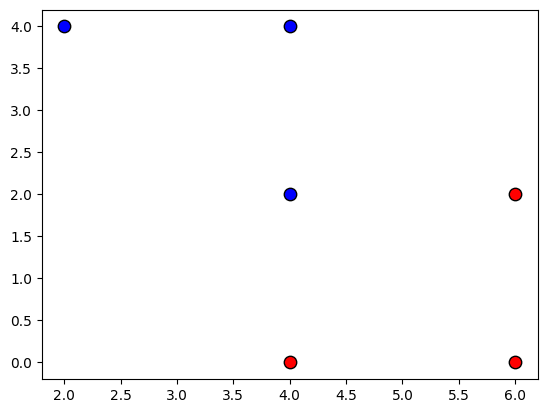

In [100]:
for x, y in data:
    color = 'blue' if y == 1 else 'red'
    plt.scatter(x[0], x[1], color=color, s=80, edgecolors='k')


- For each point, plot a scatter point.

- Blue for class 1, red for class -1.

- Black edge for better visibility.

### Create a grid of x-values for plotting decision boundary and margins

In [101]:
import numpy as np
x_vals = np.linspace(0, 8, 100)


- x_vals is 100 points between 0 and 8 (x-axis values).

### Calculate the hyperplane (decision boundary) y-values

In [102]:
# Hyperplane equation: w1*x + w2*y + b = 0
y_vals = -(w[0] * x_vals + b) / w[1]


- Rearrange equation to solve for y:
`y = -(w1*x + b) / w2`

### Calculate margin lines (offset by ±1)

In [103]:
margin_plus = -(w[0] * x_vals + b - 1) / w[1]
margin_minus = -(w[0] * x_vals + b + 1) / w[1]


- Margins correspond to:  
$
  w \cdot x + b = \pm 1
$

- Compute y-values for these margin lines


### . Plot decision boundary and margin lines

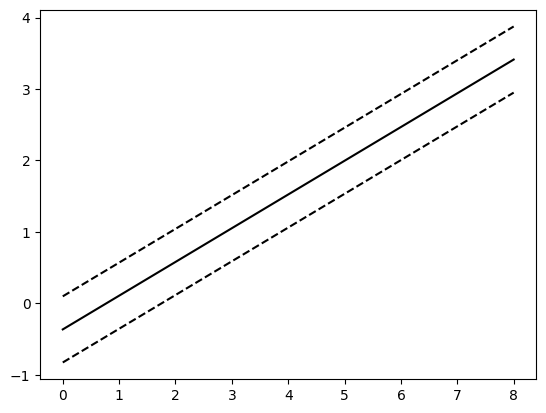

In [104]:
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
plt.plot(x_vals, margin_plus, 'k--', label='Margin')
plt.plot(x_vals, margin_minus, 'k--')


- Draw solid black line for decision boundary.

- Draw dashed black lines for margins.



### Find support vectors

In [105]:
support_vectors = []
for x, y in data:
    output = y * (w[0]*x[0] + w[1]*x[1] + b)
    if output <= 1.01:  # Points on or inside margin
        support_vectors.append(x)


- Support vectors are points on or inside the margin (margin violation).

- Collect these points to highlight.

### Highlight support vectors on the plot

In [106]:
for sv in support_vectors:
    plt.scatter(sv[0], sv[1], s=200, facecolors='none', edgecolors='green', linewidths=2, label='Support Vector' if 'Support Vector' not in plt.gca().get_legend_handles_labels()[1] else "")


- Plot support vectors with large green circles (hollow).

- Label only once in the legend.

### Final plot decorations and show

In [ ]:
plt.title("SVM Decision Boundary with Margins")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


- Add title, axis labels, legend, grid.

- Display the plot window.

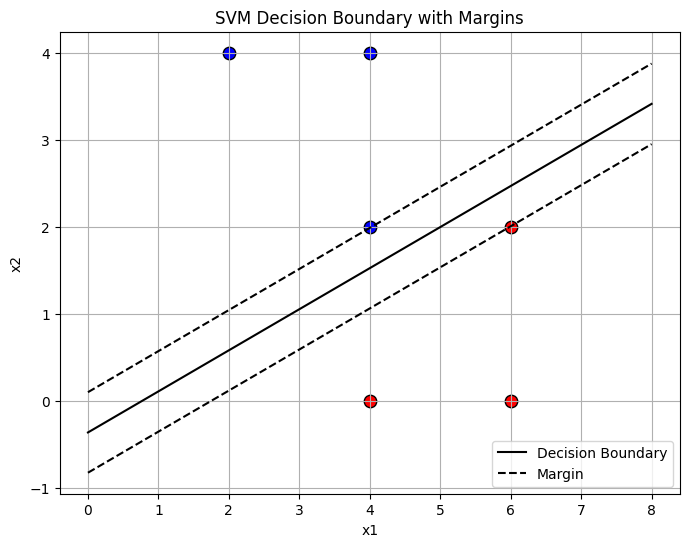

In [108]:
import matplotlib.pyplot as plt

# ---------------------
# Plotting
# ---------------------

# Prepare the plot
plt.figure(figsize=(8, 6))

# Plot data points
for x, y in data:
    color = 'blue' if y == 1 else 'red'
    plt.scatter(x[0], x[1], color=color, s=80, edgecolors='k')

# Create a grid for drawing the decision boundary
import numpy as np
x_vals = np.linspace(0, 8, 100)
# Hyperplane: w1*x + w2*y + b = 0 => y = -(w1*x + b)/w2
y_vals = -(w[0] * x_vals + b) / w[1]
# Margins: y = -(w1*x + b ± 1)/w2
margin_plus = -(w[0] * x_vals + b - 1) / w[1]
margin_minus = -(w[0] * x_vals + b + 1) / w[1]

# Plot decision boundary and margins
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
plt.plot(x_vals, margin_plus, 'k--', label='Margin')
plt.plot(x_vals, margin_minus, 'k--')

# Identify support vectors (points with margin violation: loss > 0)
support_vectors = []
for x, y in data:
    output = y * (w[0]*x[0] + w[1]*x[1] + b)
    if output <= 1.01:  # Support vectors lie on or inside margin
        support_vectors.append(x)

# Highlight support vectors
for sv in support_vectors:
    plt.scatter(sv[0], sv[1], s=200, facecolors='none', edgecolors='green', linewidths=2, label='Support Vector' if 'Support Vector' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title("SVM Decision Boundary with Margins")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()
